# Spatial Interpolation of WQ data

This document includes Python codes that clip raster within managed area

In [1]:
import rasterio as rio
from rasterio.mask import mask

from rasterio.plot import show
import geopandas as gpd

In [7]:
path = "D:/Water_Quailty/GIS_data/covariates/"
gis_path = "F:/SEACAR_WQ_2024/SEACAR_WQ_2024/GIS_Data/"
out_path = gis_path + "covariates/"
SpatialRef = '3086'

In [3]:
MA = gpd.read_file(gis_path+"/OEAT_Waterbody_Boundaries/OEAT_Waterbody_Boundary.shp")
MA.plot()

In [9]:
nameList = list(MA.WaterbodyA.unique())
nameList

['BBS', 'BB', 'CH', 'EB', 'GTM']

In [10]:
MA

,Waterbody,Shape_Leng,Shape_Area,WaterbodyA,geometry
0,Big Bend,1.909237e+06,3.983439e+09,BBS,"MULTIPOLYGON (((441668.419 642459.603, 441668...."
1,Biscayne Bay,2.631645e+05,2.614576e+08,BB,"MULTIPOLYGON (((785175.539 220368.648, 785175...."
2,Charlotte Harbor,7.846422e+05,6.889653e+08,CH,"MULTIPOLYGON (((592643.766 274498.730, 592303...."
3,Estero Bay,2.324138e+05,5.596396e+07,EB,"POLYGON ((604002.300 275253.070, 604003.726 27..."
4,GTM,3.675061e+05,3.088145e+08,GTM,"MULTIPOLYGON (((664150.981 666105.873, 664129...."


## Clip Bathymetry raster

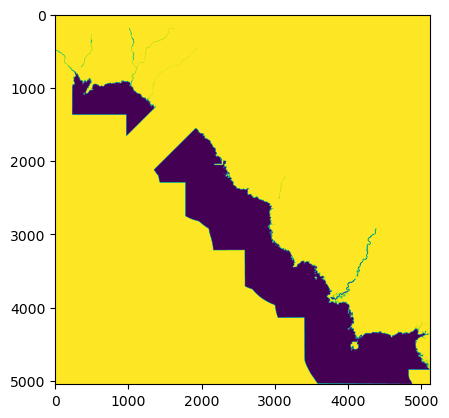

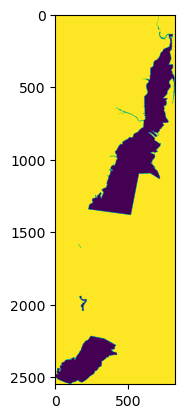

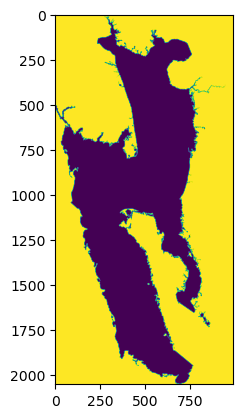

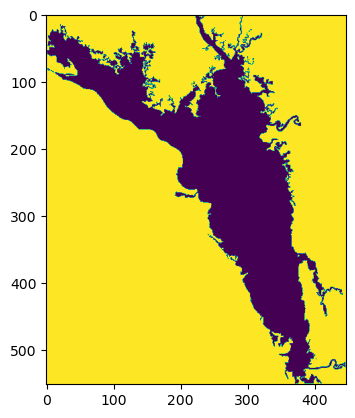

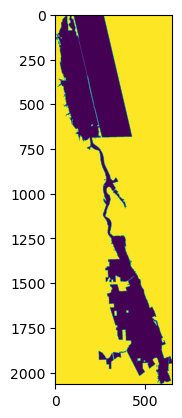

In [13]:
for name in nameList:
    MA_all = gpd.read_file(gis_path + "/OEAT_Waterbody_Boundaries/OEAT_Waterbody_Boundary.shp")
    MA = MA_all[MA_all['WaterbodyA']==name].to_crs(int(SpatialRef))
    
    with rio.open(path + "NCEI_DEM_30m.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(out_path + "bathymetry/{}.tif".format(name), "w", **out_meta) as dest:
        dest.write(out_image)

## Clip LDI raster

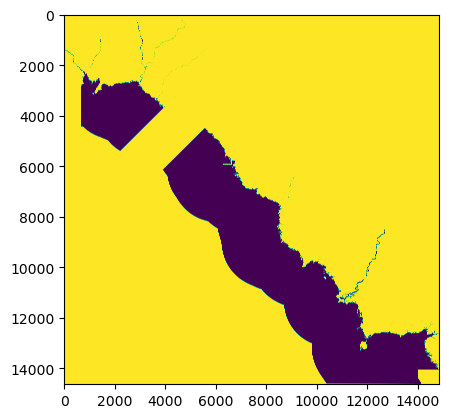

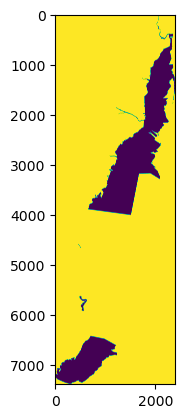

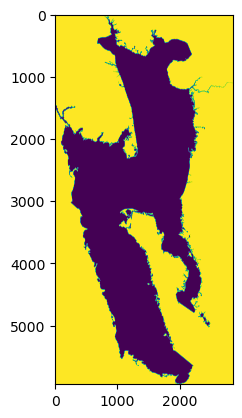

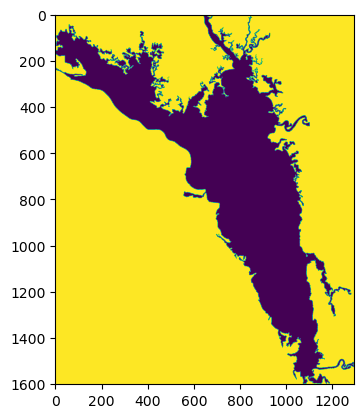

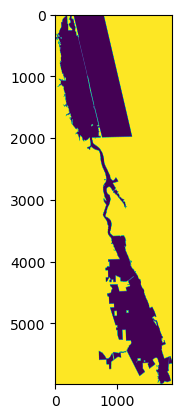

In [14]:
for name in nameList:
    MA_all = gpd.read_file(gis_path + "/OEAT_Waterbody_Boundaries/OEAT_Waterbody_Boundary.shp")
    MA = MA_all[MA_all['WaterbodyA']==name].to_crs(int(SpatialRef))
    
    with rio.open(path + "LDI_HUC12River_LogScaleSUM_prj.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(out_path + "ldi/{}.tif".format(name), "w", **out_meta) as dest:
        dest.write(out_image)

## Clip PopDen raster

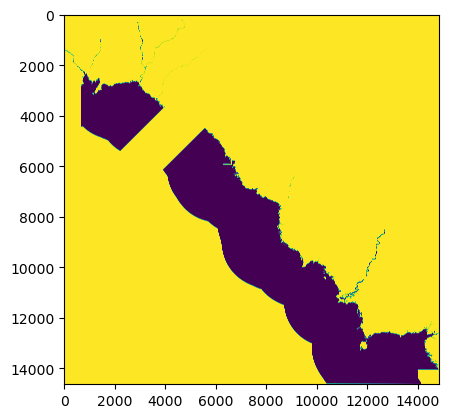

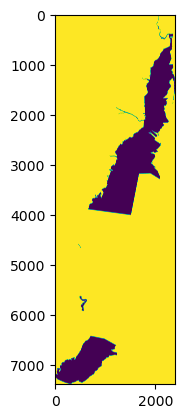

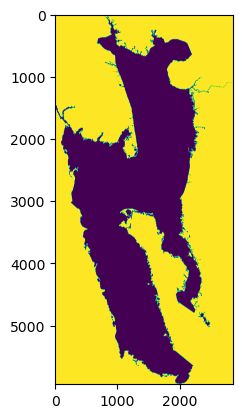

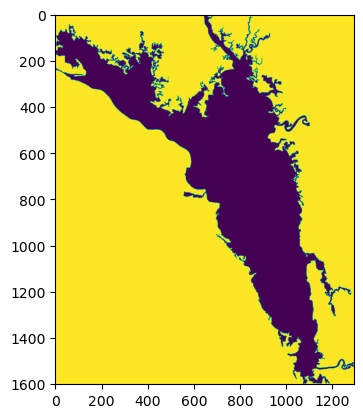

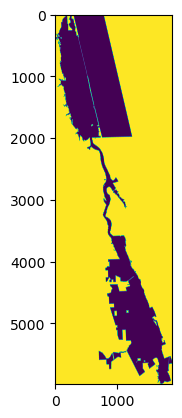

In [15]:
for name in nameList:
    MA_all = gpd.read_file(gis_path + "/OEAT_Waterbody_Boundaries/OEAT_Waterbody_Boundary.shp")
    MA = MA_all[MA_all['WaterbodyA']==name].to_crs(int(SpatialRef))
    
    with rio.open(path + "PopDens_mi2_HUC10_prj.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(out_path + "popden/{}.tif".format(name), "w", **out_meta) as dest:
        dest.write(out_image)

## Clip Water Flow (Dry)

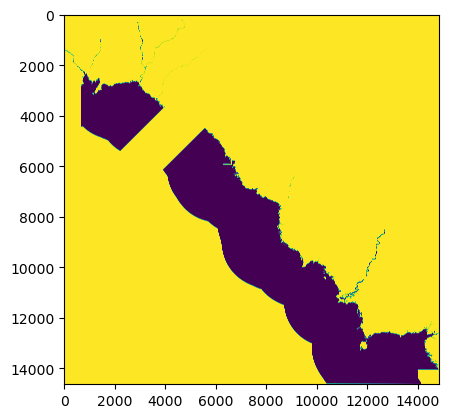

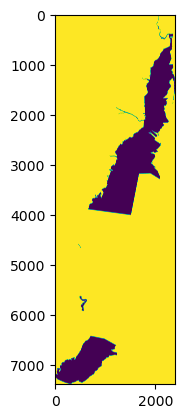

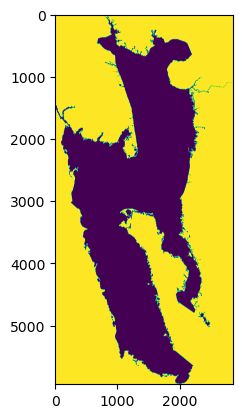

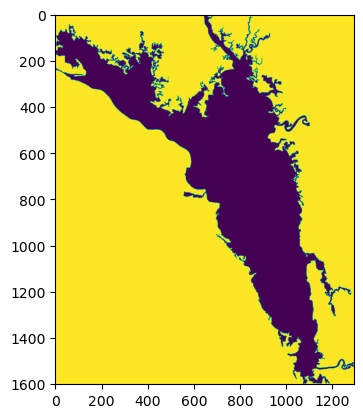

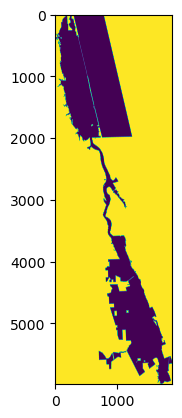

In [16]:
for name in nameList:
    MA_all = gpd.read_file(gis_path + "/OEAT_Waterbody_Boundaries/OEAT_Waterbody_Boundary.shp")
    MA = MA_all[MA_all['WaterbodyA']==name].to_crs(int(SpatialRef))
    
    with rio.open(path + "WaterFlow_Dry_MaxCFS_prj.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(out_path + "water_flow_dry/{}.tif".format(name), "w", **out_meta) as dest:
        dest.write(out_image)

## Clip Water Flow (Wet)

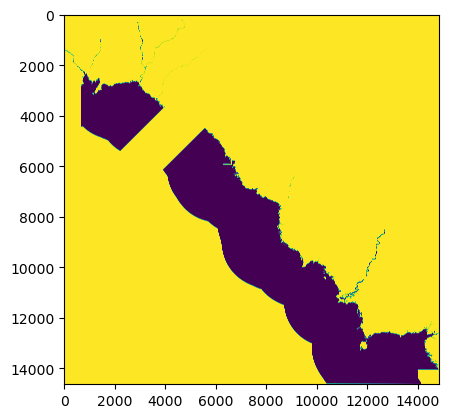

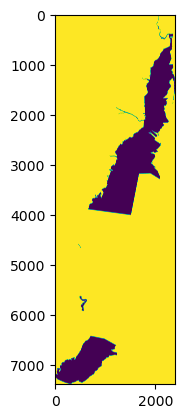

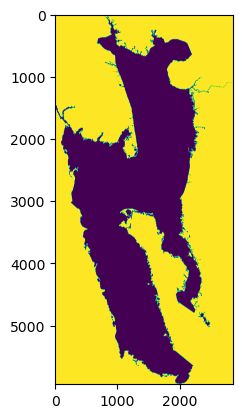

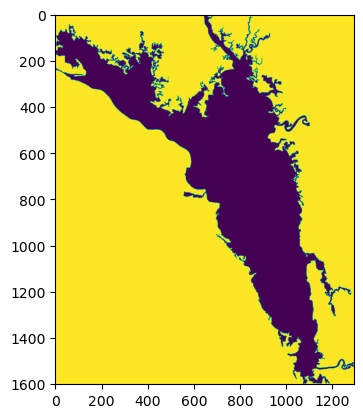

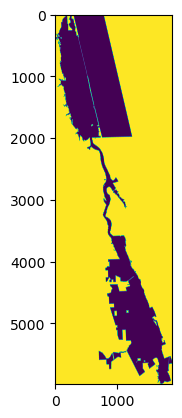

In [17]:
for name in nameList:
    MA_all = gpd.read_file(gis_path + "/OEAT_Waterbody_Boundaries/OEAT_Waterbody_Boundary.shp")
    MA = MA_all[MA_all['WaterbodyA']==name].to_crs(int(SpatialRef))
    
    with rio.open(path + "WaterFlow_Wet_MaxCFS_prj.tif", "r+") as dasy:
        #rio.plot.show(dasy.read(1))
        out_image, out_transform = mask(dasy, MA.geometry, crop=True)
        out_meta = dasy.meta
        rio.plot.show(out_image)

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rio.open(out_path + "water_flow_wet/{}.tif".format(name), "w", **out_meta) as dest:
        dest.write(out_image)